# Continuação à classificação

In [96]:
#Vou importar todos os modelos de classificação padrão do sklearn
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import (cohen_kappa_score,confusion_matrix, accuracy_score, precision_score, recall_score, 
f1_score, roc_auc_score,roc_curve,auc,r2_score,classification_report)
import matplotlib.pyplot as plt
from yellowbrick.classifier import  ROCAUC

In [2]:
#Carregar os dados
df = pd.read_csv('titanic3_processado.csv', delimiter = ',')

In [3]:
df.head()

,passenger_id,classe,sobreviveu,idade,irmaos_conjuge,pais_filhos,tarifa,sexo_female,sexo_male,embarque_24.0,embarque_C,embarque_Q,embarque_S
0,0,1,1,29.0000,0,0,14.4542,1,0,0,0,0,1
1,1,1,1,0.9167,1,2,14.4542,0,1,0,0,0,1
2,5,1,1,48.0000,0,0,26.5500,0,1,0,0,0,1
3,6,1,1,63.0000,1,0,77.9583,1,0,0,0,0,1
4,8,1,1,53.0000,2,0,51.4792,1,0,0,0,0,1


In [4]:
#Setar o passenger_id como index
df.set_index('passenger_id',inplace = True)
df.head()

,classe,sobreviveu,idade,irmaos_conjuge,pais_filhos,tarifa,sexo_female,sexo_male,embarque_24.0,embarque_C,embarque_Q,embarque_S
passenger_id,,,,,,,,,,,,
0,1,1,29.0000,0,0,14.4542,1,0,0,0,0,1
1,1,1,0.9167,1,2,14.4542,0,1,0,0,0,1
5,1,1,48.0000,0,0,26.5500,0,1,0,0,0,1
6,1,1,63.0000,1,0,77.9583,1,0,0,0,0,1
8,1,1,53.0000,2,0,51.4792,1,0,0,0,0,1


In [5]:
#Vamos ver se continuam balanceados
df.sobreviveu.value_counts() 

0    500
1    500
Name: sobreviveu, dtype: int64

In [6]:
#Vamos separar a classe da variável
X = df.drop(['sobreviveu'], axis=1)
y = df['sobreviveu']

Não sobreviveu:  500
Sobreviveu :  500


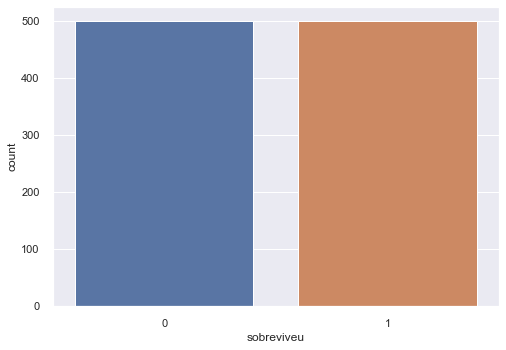

In [7]:
#Rever a distruição das amostras entre as classes
sns.set(style="darkgrid")
ax = sns.countplot(x = y)      
N, S = y.value_counts(sort=True) 
print('Não sobreviveu: ',N)
print('Sobreviveu : ',S)

### Normalização

In [8]:
from sklearn.preprocessing import MinMaxScaler
# create a scaler object
scaler = MinMaxScaler()
# fit and transform the data
X = pd.DataFrame(scaler.fit_transform(X), columns=X.columns)

In [9]:
X

,classe,idade,irmaos_conjuge,pais_filhos,tarifa,sexo_female,sexo_male,embarque_24.0,embarque_C,embarque_Q,embarque_S
0,0.0,0.361169,0.000,0.000000,0.154590,1.0,0.0,0.0,0.0,0.0,1.0
1,0.0,0.009395,0.125,0.222222,0.154590,0.0,1.0,0.0,0.0,0.0,1.0
2,0.0,0.599165,0.000,0.000000,0.283957,0.0,1.0,0.0,0.0,0.0,1.0
3,0.0,0.787056,0.125,0.000000,0.833779,1.0,0.0,0.0,0.0,0.0,1.0
4,0.0,0.661795,0.250,0.000000,0.550580,1.0,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...
995,1.0,0.035490,0.000,0.000000,0.082620,0.0,1.0,0.0,0.0,1.0,0.0
996,1.0,0.035490,0.125,0.222222,0.250802,1.0,0.0,0.0,0.0,0.0,1.0
997,0.0,0.686847,0.125,0.000000,0.635294,0.0,1.0,0.0,1.0,0.0,0.0
998,0.5,0.260960,0.125,0.000000,0.122995,0.0,1.0,0.0,0.0,0.0,1.0


In [10]:
#Vamos separar em treino e teste
#Obs: random_state deixa os valores aleatírios dentro de um range
#Eu posso usar 3,5,6, qualquer número inteiro que dentro de um range eu pego um sequencia de valores
X_treino, X_teste, y_treino, y_teste = train_test_split(X,y,test_size = 0.3,random_state = 42)

In [11]:
print(len(X_treino))
print(len(X_teste))

700
300


## K vizinhos mais próximos
* O algoritmo KNN (K-Nearest Neighbor, ou K Vizinhos Mais Próximos) faz a classificação com base na distância até algumas amostras (k) de treinamento;
* A família de algoritmos é chamada de aprendizado baseado em instâncias (instance-based learning), pois não há parâmetros para aprender;
* O modelo pressupõe que a distância é suficiente para fazer uma inferência; afora isso, nenhuma pressuposição é feita sobre os dados subjacentes ou suas distribuições;
* A parte complicada é selecionar o valor apropriado de k. Além disso, a maldição da dimensionalidade pode atrapalhar as métricas de distância, pois haverá pouca diferença entre os vizinhos mais próximos e mais distantes no caso de mais dimensões.

<img src="KNN.png" width="400px" align="left"><br>

In [12]:
#Vamos importar
from sklearn.neighbors import KNeighborsClassifier

In [13]:
#Vamos instanciar
knc = KNeighborsClassifier()

In [14]:
#Treinar
knc.fit(X_treino, y_treino)

KNeighborsClassifier()

In [15]:
knc.score(X_teste, y_teste)

0.8

In [16]:
#A seguir, apresentamos algumas das características que incluiremos em cada modelo:
knc = KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski', 
                                                metric_params=None, n_jobs=1,n_neighbors=5, p=2, weights='uniform')

In [17]:
knc.fit(X_treino, y_treino)

KNeighborsClassifier(n_jobs=1)

In [18]:
knc.score(X_teste, y_teste)

0.8

### Cross Validation. ou Validação Cruzada é uma técnica para avaliar a capacidade de generalização de um modelo,  a partir de um conjunto de dados.

In [19]:
from sklearn.model_selection import cross_val_score

In [20]:
cv_scores = cross_val_score(knc,X,y, cv=10, scoring='accuracy')
print(f'Scores = {cv_scores}')
print(f'Média dos Scores = {cv_scores.mean()}')

Scores = [0.77 0.81 0.78 0.78 0.84 0.76 0.64 0.54 0.64 0.71]
Média dos Scores = 0.727


In [21]:
#Obter a previsões
knc_previsoes = knc.predict(X_teste)
knc_previsoes

array([1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1,
       0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0,
       0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0,
       0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0,
       0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0,
       1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1,
       0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1,
       1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1,
       0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1,
       1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1,
       0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1,
       1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0,
       1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1], d

In [22]:
# Obter a previsões da probabilidade
#Note que ele retorna  probabilidade da classe 0 e 1 respectivamente
knc_previsoes_prob = knc.predict_proba(X_teste)
knc_previsoes_prob

array([[0.2, 0.8],
       [0.8, 0.2],
       [0.8, 0.2],
       [1. , 0. ],
       [0.2, 0.8],
       [0.4, 0.6],
       [0.2, 0.8],
       [0.4, 0.6],
       [0.2, 0.8],
       [0. , 1. ],
       [0.4, 0.6],
       [0.2, 0.8],
       [1. , 0. ],
       [0.8, 0.2],
       [0.8, 0.2],
       [1. , 0. ],
       [0. , 1. ],
       [0.8, 0.2],
       [0.4, 0.6],
       [0.2, 0.8],
       [0.6, 0.4],
       [0. , 1. ],
       [1. , 0. ],
       [0.8, 0.2],
       [0.4, 0.6],
       [0.4, 0.6],
       [0.6, 0.4],
       [0.8, 0.2],
       [0.6, 0.4],
       [0.6, 0.4],
       [0.4, 0.6],
       [0. , 1. ],
       [0.8, 0.2],
       [0.4, 0.6],
       [0.4, 0.6],
       [0.4, 0.6],
       [0.8, 0.2],
       [0.4, 0.6],
       [0.8, 0.2],
       [0.8, 0.2],
       [1. , 0. ],
       [0.6, 0.4],
       [0. , 1. ],
       [0.2, 0.8],
       [0.6, 0.4],
       [0.8, 0.2],
       [0.8, 0.2],
       [0.6, 0.4],
       [0.2, 0.8],
       [1. , 0. ],
       [1. , 0. ],
       [0.4, 0.6],
       [0. ,

### Matriz de Confusão 

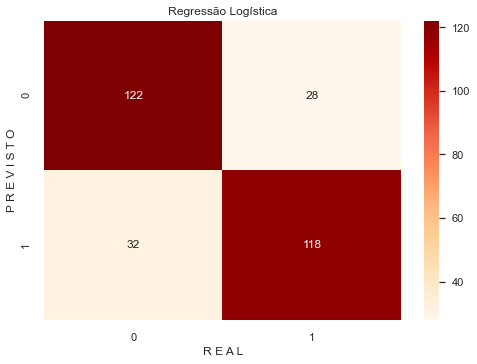

In [23]:
sns.heatmap(confusion_matrix(y_teste, knc_previsoes), cmap='OrRd', annot=True, fmt='2.0f')
plt.title('Regressão Logística')
plt.ylabel('P R E V I S T O')
plt.xlabel('R E A L')
plt.show()

In [24]:
#Acurácia, Sensibilidade positiva (VP/(VP+FN),  Precisão, Recall, F1-Score
acuracia = accuracy_score(y_teste,knc_previsoes)
precisao = precision_score(y_teste,knc_previsoes)
recall = recall_score(y_teste,knc_previsoes)
f1Score = f1_score(y_teste,knc_previsoes)
knc_curva_roc = roc_auc_score(y_teste,knc_previsoes)
kappa = cohen_kappa_score(y_teste,knc_previsoes)
print(f'Acurácia:{round(acuracia,2)}')
print(f'Precisão:{round(precisao,2)}')
print(f'Recall ou Sensibilidade:{round(recall,2)}')
print(f'F1-Score:{round(f1Score,2)}')
print(f'Kappa:{round(kappa,2)}')
print(f'Curva ROC:{round(knc_curva_roc,2)}')

Acurácia:0.8
Precisão:0.81
Recall ou Sensibilidade:0.79
F1-Score:0.8
Kappa:0.6
Curva ROC:0.8


In [25]:
print(classification_report(y_teste, knc.predict(X_teste)))

              precision    recall  f1-score   support

           0       0.79      0.81      0.80       150
           1       0.81      0.79      0.80       150

    accuracy                           0.80       300
   macro avg       0.80      0.80      0.80       300
weighted avg       0.80      0.80      0.80       300



### Curva ROC 

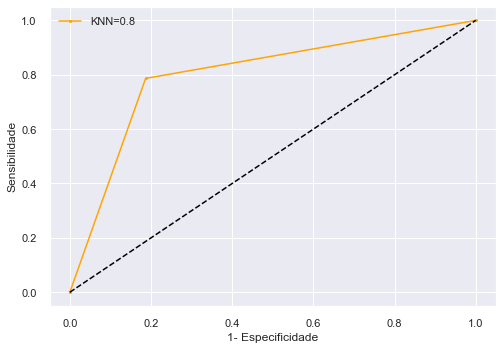

In [26]:
knc_fp,knc_vp,lim1 = roc_curve(y_teste,knc_previsoes)
plt.plot(knc_fp,knc_vp, marker='.', label='KNN='+str(round(knc_curva_roc,2)),color="orange")
plt.plot([0, 1], [0, 1], color='black', linestyle='--')
# alterando o nome dos eixos
plt.xlabel('1- Especificidade')
plt.ylabel('Sensibilidade')
# Legenda
plt.legend()
# Mostrando o gráfico
plt.show()
#fig.savefig("images/mlpr_0305.png")

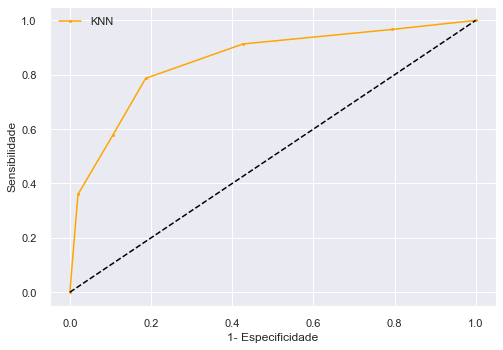

In [27]:
#Aqui estamos pegando apenas da classe 1
knc_probs = knc_previsoes_prob[:,1]
knc_fp,knc_vp,lim1 = roc_curve(y_teste,knc_probs)
plt.plot(knc_fp,knc_vp, marker='.', label='KNN',color="orange")
plt.plot([0, 1], [0, 1], color='black', linestyle='--')
# alterando o nome dos eixos
plt.xlabel('1- Especificidade')
plt.ylabel('Sensibilidade')
# Legenda
plt.legend()
# Mostrando o gráfico
plt.show()
#fig.savefig("images/mlpr_0305.png")

In [28]:
X_teste

,classe,idade,irmaos_conjuge,pais_filhos,tarifa,sexo_female,sexo_male,embarque_24.0,embarque_C,embarque_Q,embarque_S
521,0.0,0.373695,0.000,0.000000,0.278075,0.0,1.0,0.0,0.0,0.0,1.0
737,0.5,0.311064,0.000,0.000000,0.112299,0.0,1.0,0.0,0.0,0.0,1.0
740,0.5,0.874739,0.000,0.000000,0.112299,0.0,1.0,0.0,0.0,0.0,1.0
660,1.0,0.035490,0.125,0.000000,0.068850,0.0,1.0,0.0,1.0,0.0,0.0
411,1.0,0.323591,0.000,0.000000,0.604233,0.0,1.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...
468,1.0,0.398747,0.000,0.000000,0.086096,0.0,1.0,0.0,0.0,0.0,1.0
935,1.0,0.323591,0.000,0.000000,0.084447,0.0,1.0,0.0,0.0,0.0,1.0
428,1.0,0.035490,0.000,0.000000,0.084270,1.0,0.0,0.0,0.0,1.0,0.0
7,0.0,0.323591,0.000,0.000000,0.843316,1.0,0.0,0.0,0.0,0.0,1.0


In [29]:
knc_previsoes_1 = knc.predict(X_teste[:1])
knc_previsoes_1

array([1], dtype=int64)

In [30]:
knc_previsoes_1 = knc.predict_proba(X_teste[:1])
knc_previsoes_1

array([[0.2, 0.8]])

##### OBS: Note that in binary classification, recall of the positive class is also known as “sensitivity”; recall of the negative class is “specificity”

## Decision Tree - Árvore de decisão
Harrison, Matt. Machine Learning – Guia de Referência Rápida (p. 120). Novatec Editora. Edição do Kindle. 

* É como ir a um médico que faz uma série de perguntas a fim de determinar a causa de seus sintomas;
* Podemos usar um processo para criar uma árvore de decisão e ter uma série de perguntas para prever uma classe alvo;
* As vantagens desse modelo incluem suporte para dados não numéricos (em algumas implementações);
* Pouca preparação dos dados (não há necessidade de escalar); 
* Suporte para lidar com relacionamentos não lineares;
* A importância dos atributos é revelada e é fácil de explicar;

Algumas propriedades de uma árvore de decisão:
* Eficiência na execução:
  * Para a criação, percorre cada um dos m atributos e ordena todas as n amostras, O(mn log n); 
  * Para predição, você percorrerá a árvore, O(altura);
* Pré-processamento dos dados:
  * Não é necessário escalar. É preciso se livrar dos valores ausentes e convertê-los em dados numéricos;
* Para evitar uma superadequação: 
  * Defina max_depth com um número menor e aumente min_impurity_decrease;
* Interpretação dos resultados:
  * É possível percorrer a árvore de opções;
  * Por haver passos, uma árvore é ruim para lidar com relacionamentos lineares (uma pequena mudança em um número pode 
    levar a um caminho diferente). 
  * A árvore também é extremamente dependente dos dados de treinamento; 
  * Uma pequena mudança pode modificar a árvore toda.

<img src="arvores_decisao.png" width="400px" align="left"><br>

In [31]:
from sklearn.tree import DecisionTreeClassifier

In [32]:
#Importar
from sklearn.naive_bayes import GaussianNB

In [33]:
#Vamos instanciar
#O padrão do max_depth é 0
dt = DecisionTreeClassifier(random_state=42, max_depth=3)

In [34]:
#Treinar
dt.fit(X_treino, y_treino) 

DecisionTreeClassifier(max_depth=3, random_state=42)

In [35]:
dt.score(X_teste, y_teste)

0.7733333333333333

In [36]:
#min_impurity_split=None foi implementado até a versão 0.23.2 
#presort foi descontinuado foi implementado até a versão 0.23.2 
dt = DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=3, max_features=None, 
                            max_leaf_nodes=None, min_impurity_decrease=0.0, 
                            min_samples_leaf=1, min_samples_split=2, min_weight_fraction_leaf=0.0, 
                            random_state=42, splitter='best')
#Obs: Não quer dizer que quanto maio  a profundidade (max_depth) você terá um maior desempenho

In [37]:
#Treinar
dt.fit(X_treino, y_treino) 

DecisionTreeClassifier(max_depth=3, random_state=42)

In [38]:
dt.score(X_teste, y_teste)

0.7733333333333333

### Cross Validation. ou Validação Cruzada é uma técnica para avaliar a capacidade de generalização de um modelo,  a partir de um conjunto de dados.

In [39]:
cv_scores = cross_val_score(dt,X,y, cv=10, scoring='accuracy')
print(f'Scores = {cv_scores}')
print(f'Média dos Scores = {cv_scores.mean()}')

Scores = [0.8  0.79 0.75 0.77 0.76 0.73 0.66 0.66 0.65 0.71]
Média dos Scores = 0.728


In [40]:
#Obter a previsões
dt_previsoes = dt.predict(X_teste)
dt_previsoes

array([1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1,
       0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0,
       1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0,
       0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0,
       0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0,
       1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1,
       0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1,
       1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1,
       0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1,
       1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1,
       0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1,
       1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1], d

In [41]:
#Obter a previsões da probabilidade
#Note que ele retorna  probabilidade da classe 0 e 1 respectivamente
dt_previsoes_prob = dt.predict_proba(X_teste)
dt_previsoes_prob

array([[0.4516129 , 0.5483871 ],
       [0.78114478, 0.21885522],
       [0.78114478, 0.21885522],
       [0.78114478, 0.21885522],
       [0.78114478, 0.21885522],
       [0.78114478, 0.21885522],
       [0.4516129 , 0.5483871 ],
       [0.30973451, 0.69026549],
       [0.30973451, 0.69026549],
       [0.04794521, 0.95205479],
       [0.30973451, 0.69026549],
       [0.04794521, 0.95205479],
       [0.78114478, 0.21885522],
       [0.78114478, 0.21885522],
       [0.78114478, 0.21885522],
       [0.78114478, 0.21885522],
       [0.04794521, 0.95205479],
       [0.78114478, 0.21885522],
       [0.30973451, 0.69026549],
       [0.30973451, 0.69026549],
       [0.78114478, 0.21885522],
       [0.04794521, 0.95205479],
       [0.78114478, 0.21885522],
       [0.78114478, 0.21885522],
       [0.27777778, 0.72222222],
       [0.04794521, 0.95205479],
       [0.66666667, 0.33333333],
       [0.78114478, 0.21885522],
       [0.78114478, 0.21885522],
       [0.78114478, 0.21885522],
       [0.

### Matriz de Confusão 

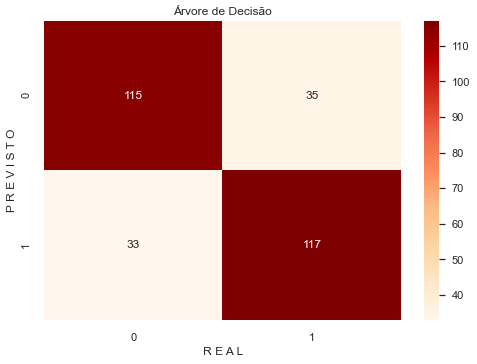

In [42]:
sns.heatmap(confusion_matrix(y_teste, dt_previsoes), cmap='OrRd', annot=True, fmt='2.0f')
plt.title('Árvore de Decisão')
plt.ylabel('P R E V I S T O')
plt.xlabel('R E A L')
plt.show()

In [43]:
#Acurácia, Sensibilidade positiva (VP/(VP+FN),  Precisão, Recall, F1-Score
acuracia = accuracy_score(y_teste,dt_previsoes)
precisao = precision_score(y_teste,dt_previsoes)
recall = recall_score(y_teste,dt_previsoes)
f1Score = f1_score(y_teste,dt_previsoes)
dt_curva_roc = roc_auc_score(y_teste,dt_previsoes)
kappa = cohen_kappa_score(y_teste,dt_previsoes)
print(f'Acurácia:{round(acuracia,2)}')
print(f'Precisão:{round(precisao,2)}')
print(f'Recall ou Sensibilidade:{round(recall,2)}')
print(f'F1-Score:{round(f1Score,2)}')
print(f'Kappa:{round(kappa,2)}')
print(f'Curva ROC:{round(dt_curva_roc,2)}')

Acurácia:0.77
Precisão:0.77
Recall ou Sensibilidade:0.78
F1-Score:0.77
Kappa:0.55
Curva ROC:0.77


In [44]:
print(classification_report(y_teste, dt.predict(X_teste)))

              precision    recall  f1-score   support

           0       0.78      0.77      0.77       150
           1       0.77      0.78      0.77       150

    accuracy                           0.77       300
   macro avg       0.77      0.77      0.77       300
weighted avg       0.77      0.77      0.77       300



### Curva ROC

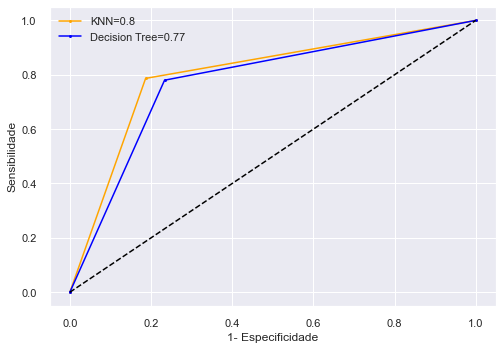

In [45]:
knc_fp,knc_vp,lim1 = roc_curve(y_teste,knc_previsoes)
dt_fp,dt_vp,lim2 = roc_curve(y_teste,dt_previsoes)
plt.plot(knc_fp,knc_vp, marker='.', label='KNN='+str(round(knc_curva_roc,2)),color="orange")
plt.plot(dt_fp,dt_vp, marker='.', label='Decision Tree='+str(round(dt_curva_roc,2)),color="blue")
plt.plot([0, 1], [0, 1], color='black', linestyle='--')
# alterando o nome dos eixos
plt.xlabel('1- Especificidade')
plt.ylabel('Sensibilidade')
# Legenda
plt.legend()
# Mostrando o gráfico
plt.show()
#fig.savefig("images/mlpr_0305.png")

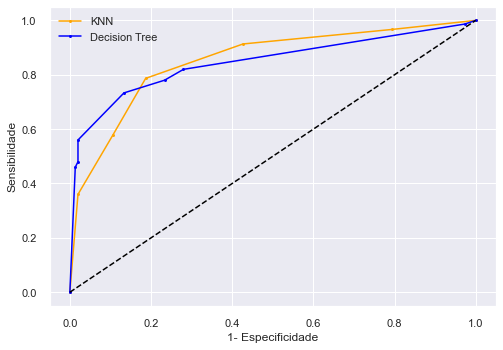

In [46]:
#Aqui estamos pegando apenas da classe 1
knc_probs = knc_previsoes_prob[:,1]
dt_probs = dt_previsoes_prob[:,1]
knc_fp,knc_vp,lim1 = roc_curve(y_teste,knc_probs)
dt_fp,dt_vp,lim2 = roc_curve(y_teste,dt_probs)
plt.plot(knc_fp,knc_vp, marker='.', label='KNN',color="orange")
plt.plot(dt_fp,dt_vp, marker='.', label='Decision Tree',color="blue")
plt.plot([0, 1], [0, 1], color='black', linestyle='--')
# alterando o nome dos eixos
plt.xlabel('1- Especificidade')
plt.ylabel('Sensibilidade')
# Legenda
plt.legend()
# Mostrando o gráfico
plt.show()
#fig.savefig("images/mlpr_0305.png")

In [47]:
dt_previsoes_1 = dt.predict(X_teste[:1])
dt_previsoes_1

array([1], dtype=int64)

In [48]:
dt_previsoes_1 = dt.predict_proba(X_teste[:1])
dt_previsoes_1

array([[0.4516129, 0.5483871]])

## Floresta aleatória - RandomForest
Harrison, Matt. Machine Learning – Guia de Referência Rápida (p. 128). Novatec Editora. Edição do Kindle. 

* Floresta aleatória (random forest) é um conjunto de árvores de decisão;
* Ela usa bagging para corrigir a tendência das árvores de decisão à superadequação;
* Ao criar várias árvores treinadas com subamostras e atributos aleatórios dos dados, a variância é reduzida;
* Como o treinamento é feito em subamostras dos dados, as florestas aleatórias são capazes de avaliar o erro OOB e o desempenho;
* Podem também exibir a importância dos atributos, calculando a média da importância em todas as árvores;
* Sempre que adicionar outro membro (e seu processo de seleção for independente dos demais), um resultado melhor será obtido;
* A floresta aleatória tem sido uma excelente ferramenta tanto para classificação como para regressão, embora, recentemente, tenha cedido espaço para as árvores com gradient boosting.


Algumas propriedades:
* Eficiência na execução 
  * Deve criar j árvores aleatórias. Isso pode ser feito em paralelo usando n_jobs. A complexidade de cada árvore é de O(mn
    log n), em que n é o número de amostras e m é o número de atributos. Para a criação, percorre cada um dos m atributos
    em um laço e ordena todas as n amostras, O(mn log n). Para predição, percorre a árvore, O(altura);
* Pré-processamento dos dados não é necessário;
* Para evitar uma superadequação, adicione mais árvores (n_estimators). Use um valor menor para max_depth;
* Interpretação dos resultados 
  * Tem suporte para importância de atributos, porém não há uma única árvore de decisão para percorrer. É possível 
    inspecionar árvores únicas do conjunto.

<img src="random_forest.png" width="600px" align="left"><br>

In [49]:
from sklearn.ensemble import RandomForestClassifier

In [50]:
rf = RandomForestClassifier(random_state=42)

In [51]:
rf.fit(X_treino, y_treino)

RandomForestClassifier(random_state=42)

In [52]:
rf.score(X_teste, y_teste)

0.7966666666666666

In [53]:
rf = RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini', max_depth=None, max_features='auto', 
                            max_leaf_nodes=None, min_impurity_decrease=0.0, min_samples_leaf=1, 
                            min_samples_split=2, min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1, 
                            oob_score=False, random_state=42, verbose=0, warm_start=False)

In [54]:
rf.fit(X_treino, y_treino)

RandomForestClassifier(max_features='auto', n_estimators=10, n_jobs=1,
                       random_state=42)

In [55]:
rf.score(X_teste, y_teste) 

0.78

### Cross Validation. ou Validação Cruzada é uma técnica para avaliar a capacidade de generalização de um modelo,  a partir de um conjunto de dados.

In [56]:
cv_scores = cross_val_score(rf,X,y, cv=10, scoring='accuracy')
print(f'Scores = {cv_scores}')
print(f'Média dos Scores = {cv_scores.mean()}')

Scores = [0.82 0.8  0.77 0.77 0.81 0.77 0.69 0.56 0.62 0.74]
Média dos Scores = 0.7350000000000001


In [57]:
#Obter a previsões
rf_previsoes = rf.predict(X_teste)
rf_previsoes

array([0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1,
       0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0,
       0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0,
       0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0,
       1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1,
       0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1,
       1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1,
       0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0,
       1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1,
       1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1,
       1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0,
       1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1], d

In [58]:
#Obter a previsões da probabilidade
#Note que ele retorna  probabilidade da classe 0 e 1 respectivamente
rf_previsoes_prob = rf.predict_proba(X_teste)
rf_previsoes_prob

array([[0.55      , 0.45      ],
       [0.8       , 0.2       ],
       [0.8       , 0.2       ],
       [1.        , 0.        ],
       [0.7       , 0.3       ],
       [0.5       , 0.5       ],
       [0.6       , 0.4       ],
       [0.9       , 0.1       ],
       [0.22332112, 0.77667888],
       [0.1       , 0.9       ],
       [0.2       , 0.8       ],
       [0.1       , 0.9       ],
       [1.        , 0.        ],
       [0.9       , 0.1       ],
       [1.        , 0.        ],
       [0.6       , 0.4       ],
       [0.        , 1.        ],
       [0.8       , 0.2       ],
       [0.13333333, 0.86666667],
       [0.3       , 0.7       ],
       [0.58077312, 0.41922688],
       [0.1       , 0.9       ],
       [1.        , 0.        ],
       [0.9       , 0.1       ],
       [0.8       , 0.2       ],
       [0.        , 1.        ],
       [0.8       , 0.2       ],
       [1.        , 0.        ],
       [0.2       , 0.8       ],
       [1.        , 0.        ],
       [0.

### Matriz de Confusão

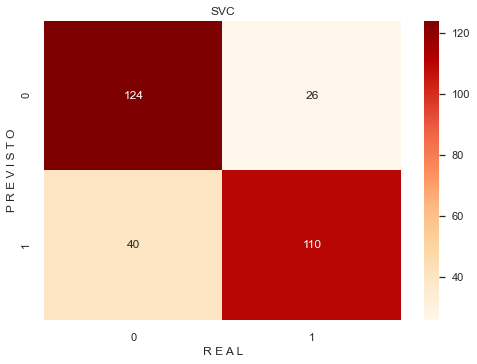

In [59]:
sns.heatmap(confusion_matrix(y_teste, rf_previsoes), cmap='OrRd', annot=True, fmt='2.0f')
plt.title('SVC')
plt.ylabel('P R E V I S T O')
plt.xlabel('R E A L')
plt.show()

In [60]:
#Acurácia, Sensibilidade positiva (VP/(VP+FN),  Precisão, Recall, F1-Score
acuracia = accuracy_score(y_teste,rf_previsoes)
precisao = precision_score(y_teste,rf_previsoes)
recall = recall_score(y_teste,rf_previsoes)
f1Score = f1_score(y_teste,rf_previsoes)
rf_curva_roc = roc_auc_score(y_teste,rf_previsoes)
kappa = cohen_kappa_score(y_teste,rf_previsoes)
print(f'Acurácia:{round(acuracia,2)}')
print(f'Precisão:{round(precisao,2)}')
print(f'Recall ou Sensibilidade:{round(recall,2)}')
print(f'F1-Score:{round(f1Score,2)}')
print(f'Kappa:{round(kappa,2)}')
print(f'Curva ROC:{round(rf_curva_roc,2)}')

Acurácia:0.78
Precisão:0.81
Recall ou Sensibilidade:0.73
F1-Score:0.77
Kappa:0.56
Curva ROC:0.78


In [101]:
print(classification_report(y_teste, rf.predict(X_teste)))

              precision    recall  f1-score   support

           0       0.76      0.83      0.79       150
           1       0.81      0.73      0.77       150

    accuracy                           0.78       300
   macro avg       0.78      0.78      0.78       300
weighted avg       0.78      0.78      0.78       300



### Curva ROC

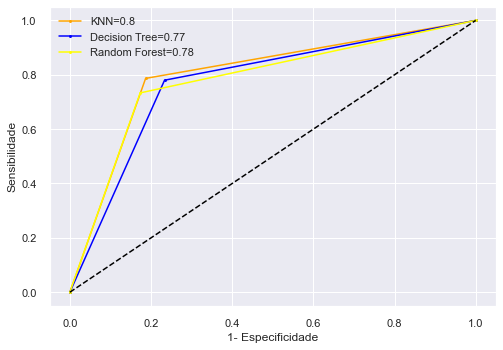

In [62]:
knc_fp,knc_vp,lim1 = roc_curve(y_teste,knc_previsoes)
dt_fp,dt_vp,lim2 = roc_curve(y_teste,dt_previsoes)
rf_fp,rf_vp,lim3 = roc_curve(y_teste,rf_previsoes)
plt.plot(knc_fp,knc_vp, marker='.', label='KNN='+str(round(knc_curva_roc,2)),color="orange")
plt.plot(dt_fp,dt_vp, marker='.', label='Decision Tree='+str(round(dt_curva_roc,2)),color="blue")
plt.plot(rf_fp,rf_vp, marker='.', label='Random Forest='+str(round(rf_curva_roc,2)),color="yellow")
plt.plot([0, 1], [0, 1], color='black', linestyle='--')
# alterando o nome dos eixos
plt.xlabel('1- Especificidade')
plt.ylabel('Sensibilidade')
# Legenda
plt.legend()
# Mostrando o gráfico
plt.show()
#fig.savefig("images/mlpr_0305.png")

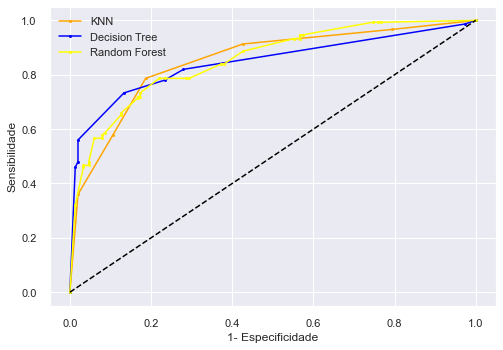

In [63]:
#Aqui estamos pegando apenas da classe 1
knc_probs = knc_previsoes_prob[:,1]
dt_probs = dt_previsoes_prob[:,1]
rf_probs = rf_previsoes_prob[:,1]
knc_fp,knc_vp,lim1 = roc_curve(y_teste,knc_probs)
dt_fp,dt_vp,lim2 = roc_curve(y_teste,dt_probs)
rf_fp,rf_vp,lim3 = roc_curve(y_teste,rf_probs)
plt.plot(knc_fp,knc_vp, marker='.', label='KNN',color="orange")
plt.plot(dt_fp,dt_vp, marker='.', label='Decision Tree',color="blue")
plt.plot(rf_fp,rf_vp, marker='.', label='Random Forest',color="yellow")
plt.plot([0, 1], [0, 1], color='black', linestyle='--')
# alterando o nome dos eixos
plt.xlabel('1- Especificidade')
plt.ylabel('Sensibilidade')
# Legenda
plt.legend()
# Mostrando o gráfico
plt.show()
#fig.savefig("images/mlpr_0305.png")

In [64]:
rf_previsoes_1 = rf.predict(X_teste[:1])
rf_previsoes_1

array([0], dtype=int64)

In [65]:
rf_previsoes_1 = rf.predict_proba(X_teste[:1])
rf_previsoes_1

array([[0.55, 0.45]])

# XGBoost
Harrison, Matt. Machine Learning – Guia de Referência Rápida (p. 132). Novatec Editora. Edição do Kindle. 

* O XGBoost (https://oreil.ly/WBo0g) é uma biblioteca popular, além do scikit-learn;
* Ele cria uma árvore fraca e, então, “melhora” as árvores subsequentes (faz um boosting) a fim de reduzir os erros residuais;
* O algoritmo tenta capturar e tratar qualquer padrão nos erros, até que pareçam ser aleatórios.


O XGBoost tem as seguintes propriedades:
* Eficiência na execução: 
  * O XGBoost pode executar em paralelo. Utilize a opção n_jobs para informar o número de CPUs. Use a GPU para ter um 
    desempenho melhor ainda;
* Pré-processamento dos dados:
  * Não é necessário escalar com modelos baseados em árvore. É preciso codificar os dados de categoria;
* Para evitar uma superadequação: 
  * O parâmetro early_stopping_rounds=N pode ser definido para interromper o treinamento caso não haja melhoras após N 
    rodadas. As regularizações L1 e L2 são controladas por reg_alpha e reg_lambda, respectivamente. Números maiores são 
    mais conservadores;
* Interpretação dos resultados inclui importância de atributos.


Note: O XGBoost tem um parâmetro extra no método .fit. O parâmetro early_stopping_rounds pode ser combinado com o parâmetro eval_set para dizer ao XGBoost que pare de criar árvores caso a métrica de avaliação não tenha melhorado após esse número de rodadas de boosting (melhorias). 'eval_metric também pode ser definido com um dos seguintes valores: 'rmse', 'mae', 'logloss', 'error' (default), 'auc', 'aucpr', bem como com uma função personalizada.

Parâmetros da instância: 
* max_depth=3 Profundidade máxima;
* learning_rate=0.1 Taxa de aprendizagem (também chamada de eta) para boosting (entre 0 e 1). Após cada passo de boosting, (melhoria) os pesos recém-adicionados são escalados de acordo com esse fator. Quanto menor o valor, mais conservador será, mas também serão necessárias mais árvores para convergir. Na chamada a .train, você pode passar um parâmetro learning_rates, que é uma lista de taxas em cada rodada (isto é, [.1]*100 + [.05]*100). 
* n_estimators=100 Número de rodadas ou árvores melhoradas;
* silent=True.....

Caso queiram ver mais parâmetros vejam no link: https://oreil.ly/WBo0g 

Harrison, Matt. Machine Learning – Guia de Referência Rápida (p. 134). Novatec Editora. Edição do Kindle. 

<img src="xgboost.png" width="300px" align="left"><br>

In [154]:
#Instalando o xgboost
#!pip install xgboost

In [66]:
#Importando
import xgboost as xgb

In [102]:
xgb = xgb.XGBClassifier(random_state=42) 

In [103]:
xgb.fit(X_treino,y_treino,early_stopping_rounds=10,eval_set=[(X_teste, y_teste)])

[0]	validation_0-logloss:0.60165
[1]	validation_0-logloss:0.54625
[2]	validation_0-logloss:0.51186
[3]	validation_0-logloss:0.48918
[4]	validation_0-logloss:0.47556
[5]	validation_0-logloss:0.45741
[6]	validation_0-logloss:0.44939
[7]	validation_0-logloss:0.44442
[8]	validation_0-logloss:0.43557
[9]	validation_0-logloss:0.43334
[10]	validation_0-logloss:0.43059
[11]	validation_0-logloss:0.43095
[12]	validation_0-logloss:0.42817
[13]	validation_0-logloss:0.42918
[14]	validation_0-logloss:0.42860
[15]	validation_0-logloss:0.42455
[16]	validation_0-logloss:0.42639
[17]	validation_0-logloss:0.42261
[18]	validation_0-logloss:0.42218
[19]	validation_0-logloss:0.42150
[20]	validation_0-logloss:0.42094
[21]	validation_0-logloss:0.42221
[22]	validation_0-logloss:0.42295
[23]	validation_0-logloss:0.42246
[24]	validation_0-logloss:0.42435
[25]	validation_0-logloss:0.42507
[26]	validation_0-logloss:0.42862
[27]	validation_0-logloss:0.42871
[28]	validation_0-logloss:0.42965
[29]	validation_0-loglos

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=100,
              n_jobs=0, num_parallel_tree=1, predictor='auto', random_state=42,
              reg_alpha=0, reg_lambda=1, ...)

In [104]:
xgb.score(X_teste, y_teste) 

0.83

In [105]:
#Obter a previsões
xgb_previsoes = xgb.predict(X_teste)
xgb_class_previsoes

array([0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1,
       0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0,
       1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1,
       0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0,
       0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0,
       1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1,
       0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1,
       1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1,
       0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0,
       1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1,
       0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1,
       1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0,
       1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1])

In [106]:
#Obter a previsões da probabilidade
#Note que ele retorna  probabilidade da classe 0 e 1 respectivamente
xgb_previsoes_prob = xgb.predict_proba(X_teste)
xgb_previsoes_prob

array([[0.5037487 , 0.49625129],
       [0.83611536, 0.16388461],
       [0.76125175, 0.23874825],
       [0.9411214 , 0.05887861],
       [0.5239504 , 0.4760496 ],
       [0.4583692 , 0.5416308 ],
       [0.5447569 , 0.4552431 ],
       [0.7300595 , 0.2699405 ],
       [0.2312895 , 0.7687105 ],
       [0.03658408, 0.9634159 ],
       [0.29840553, 0.7015945 ],
       [0.2929625 , 0.7070375 ],
       [0.9600317 , 0.03996829],
       [0.8396622 , 0.1603378 ],
       [0.9164006 , 0.0835994 ],
       [0.66202486, 0.33797517],
       [0.22057903, 0.779421  ],
       [0.8883144 , 0.11168555],
       [0.2159465 , 0.7840535 ],
       [0.23874426, 0.76125574],
       [0.6041174 , 0.39588258],
       [0.24503386, 0.75496614],
       [0.9542224 , 0.04577761],
       [0.54779613, 0.45220384],
       [0.7311914 , 0.26880863],
       [0.04238397, 0.95761603],
       [0.70457107, 0.29542893],
       [0.8604642 , 0.13953575],
       [0.8334341 , 0.16656591],
       [0.90481186, 0.09518813],
       [0.

### Matriz de Confusão 

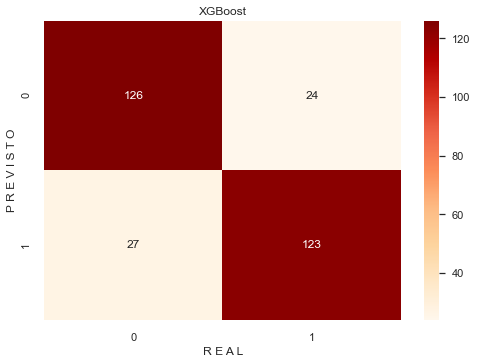

In [107]:
sns.heatmap(confusion_matrix(y_teste,xgb_previsoes), cmap='OrRd', annot=True, fmt='2.0f')
plt.title('XGBoost')
plt.ylabel('P R E V I S T O')
plt.xlabel('R E A L')
plt.show()

In [108]:
#Acurácia, Sensibilidade positiva (VP/(VP+FN),  Precisão, Recall, F1-Score
acuracia = accuracy_score(y_teste,xgb_previsoes)
precisao = precision_score(y_teste,xgb_previsoes)
recall = recall_score(y_teste,xgb_previsoes)
f1Score = f1_score(y_teste,xgb_previsoes)
xgb_curva_roc = roc_auc_score(y_teste,xgb_previsoes)
kappa = cohen_kappa_score(y_teste,xgb_previsoes)
print(f'Acurácia:{round(acuracia,2)}')
print(f'Precisão:{round(precisao,2)}')
print(f'Recall ou Sensibilidade:{round(recall,2)}')
print(f'F1-Score:{round(f1Score,2)}')
print(f'Kappa:{round(kappa,2)}')
print(f'Curva ROC:{round(xgb_curva_roc,2)}')

Acurácia:0.83
Precisão:0.84
Recall ou Sensibilidade:0.82
F1-Score:0.83
Kappa:0.66
Curva ROC:0.83


In [109]:
print(classification_report(y_teste,xgb_previsoes))


              precision    recall  f1-score   support

           0       0.82      0.84      0.83       150
           1       0.84      0.82      0.83       150

    accuracy                           0.83       300
   macro avg       0.83      0.83      0.83       300
weighted avg       0.83      0.83      0.83       300



### Curva ROC

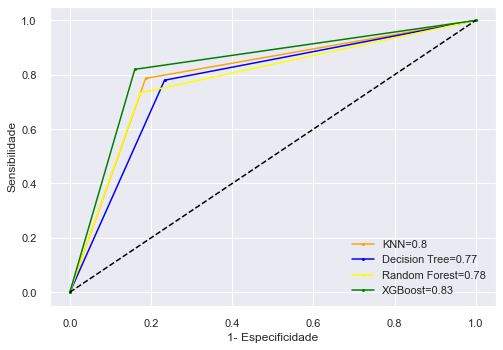

In [110]:
knc_fp,knc_vp,lim1 = roc_curve(y_teste,knc_previsoes)
dt_fp,dt_vp,lim2 = roc_curve(y_teste,dt_previsoes)
rf_fp,rf_vp,lim3 = roc_curve(y_teste,rf_previsoes)
xgb_fp,xgb_vp,lim4 = roc_curve(y_teste,xgb_previsoes)
plt.plot(knc_fp,knc_vp, marker='.', label='KNN='+str(round(knc_curva_roc,2)),color="orange")
plt.plot(dt_fp,dt_vp, marker='.', label='Decision Tree='+str(round(dt_curva_roc,2)),color="blue")
plt.plot(rf_fp,rf_vp, marker='.', label='Random Forest='+str(round(rf_curva_roc,2)),color="yellow")
plt.plot(xgb_fp,xgb_vp, marker='.', label='XGBoost='+str(round(xgb_curva_roc,2)),color="green")
plt.plot([0, 1], [0, 1], color='black', linestyle='--')
# alterando o nome dos eixos
plt.xlabel('1- Especificidade')
plt.ylabel('Sensibilidade')
# Legenda
plt.legend()
# Mostrando o gráfico
plt.show()
#fig.savefig("images/mlpr_0305.png")

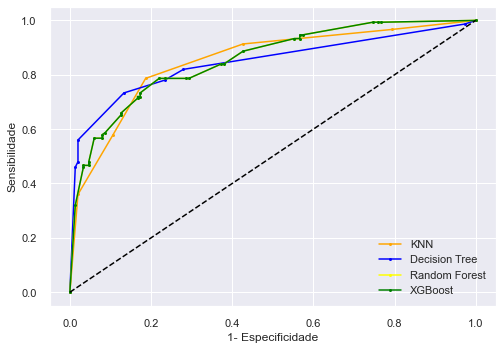

In [111]:
#Aqui estamos pegando apenas da classe 1
knc_probs = knc_previsoes_prob[:,1]
dt_probs = dt_previsoes_prob[:,1]
rf_probs = rf_previsoes_prob[:,1]
xgb_probs = rf_previsoes_prob[:,1]
knc_fp,knc_vp,lim1 = roc_curve(y_teste,knc_probs)
dt_fp,dt_vp,lim2 = roc_curve(y_teste,dt_probs)
rf_fp,rf_vp,lim3 = roc_curve(y_teste,rf_probs)
xgb_fp,xgb_vp,lim3 = roc_curve(y_teste,xgb_probs)
plt.plot(knc_fp,knc_vp, marker='.', label='KNN',color="orange")
plt.plot(dt_fp,dt_vp, marker='.', label='Decision Tree',color="blue")
plt.plot(rf_fp,rf_vp, marker='.', label='Random Forest',color="yellow")
plt.plot(xgb_fp,xgb_vp, marker='.', label='XGBoost',color="green")
plt.plot([0, 1], [0, 1], color='black', linestyle='--')
# alterando o nome dos eixos
plt.xlabel('1- Especificidade')
plt.ylabel('Sensibilidade')
# Legenda
plt.legend()
# Mostrando o gráfico
plt.show()
#fig.savefig("images/mlpr_0305.png")

In [112]:
xgb_previsoes_1 = xgb.predict(X_teste[:1])
xgb_previsoes_1

array([0])

In [114]:
xgb_previsoes_1 = xgb.predict_proba(X_teste[:1])
xgb_previsoes_1

array([[0.5037487 , 0.49625129]], dtype=float32)

### Referências

### Harrison, Matt. Machine Learning – Guia de Referência Rápida. Novatec Editora. Edição do Kindle. 
### KNeighborsClassifier. Disponível em: https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html. Acesso em 19/10/2022.
### Decision Tree. Disponível em: https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html. Acesso em 19/10/2022.
### RandomForestClassifier. Disponível em: https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html. Acesso em 19/10/2022.